In [37]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)
df.head()

,CustomerID,Genre,Age,income,score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [46]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
y_pred = model.fit_predict(df[['income', 'score']])

In [47]:
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [48]:
df['cluster'] = y_pred
df.head()

,CustomerID,Genre,Age,income,score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


<function matplotlib.pyplot.legend(*args, **kwargs)>

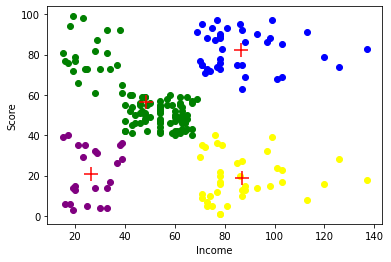

In [53]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1.income, df1.score, color='green')
plt.scatter(df2.income, df2.score, color='yellow')
plt.scatter(df3.income, df3.score, color='blue')
plt.scatter(df4.income, df4.score, color='purple')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],s=200, color='red', marker='+', label='Centroid')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend

In [54]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['income', 'score']])
    sse.append(km.inertia_)
sse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25338.024582200735,
 21829.135638779822]

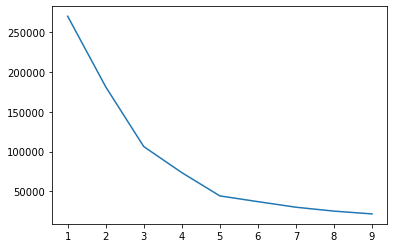

In [55]:
plt.plot(k_rng, sse)